In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


DATA PREPROCESSING

In [17]:
# Load the training dataset
train_file_name = 'train.csv'
train_data = pd.read_csv(train_file_name)

# Load the testing dataset
test_file_name = 'test.csv'
test_data = pd.read_csv(test_file_name)
print("Training Dataset:")
print(train_data.head())
print("\nTesting Dataset:")
print(test_data.head())

Training Dataset:
        id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    90312         M       19.550         23.21          128.90     1174.0   
1   906564         B       14.690         13.98           98.22      656.1   
2  8910506         B       12.870         16.21           82.38      512.2   
3   917897         B        9.847         15.68           63.00      293.2   
4   898143         B        9.606         16.84           61.64      280.5   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.10100           0.13180         0.18560              0.10210   
1          0.10310           0.18360         0.14500              0.06300   
2          0.09425           0.06219         0.03900              0.01615   
3          0.09492           0.08419         0.02330              0.02416   
4          0.08481           0.09228         0.08422              0.02292   

   ...  radius_worst  texture_worst  perimeter_wor

In [18]:
data = pd.read_csv("train.csv")  # Replace "your_dataset.csv" with the actual file path

features_with_missing_values = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
    'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
    'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Create a copy of the dataset
data_filled = data.copy()

# Loop through each feature with missing data
for feature in features_with_missing_values:
    if data_filled[feature].eq(0).any():
        missing_data = data_filled[data_filled[feature] == 0]
        non_missing_data = data_filled[data_filled[feature] != 0]

        X = non_missing_data.drop(columns=[feature])
        y = non_missing_data[feature]

        # Check if there are samples with missing data for training
        if not missing_data.empty:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Train a linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)
            predicted_values = model.predict(missing_data.drop(columns=[feature]))
            data_filled.loc[data_filled[feature] == 0, feature] = predicted_values

In [19]:
scaler = MinMaxScaler()
data_normalized = data_filled.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

In [20]:
data_normalized.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,90312,1.0,0.594870,0.456544,0.588142,0.437116,0.525361,0.329672,0.445504,0.526151,...,0.458556,0.490938,0.456148,0.277182,0.305338,0.192189,0.351369,0.665118,0.240200,0.137610
1,906564,0.0,0.364854,0.144403,0.376132,0.217434,0.548170,0.492233,0.352168,0.339193,...,0.303451,0.168443,0.317197,0.153362,0.350756,0.312975,0.305844,0.400678,0.299834,0.242949
2,8910506,0.0,0.278716,0.219817,0.266671,0.156394,0.452047,0.111219,0.108484,0.115179,...,0.212380,0.309701,0.193536,0.101332,0.309061,0.132241,0.214270,0.205207,0.484438,0.102191
3,917897,0.0,0.135643,0.201894,0.132748,0.063499,0.459324,0.180260,0.072391,0.153479,...,0.117752,0.292377,0.119080,0.047016,0.430422,0.175273,0.128547,0.232795,0.222618,0.243015
4,898143,0.0,0.124237,0.241123,0.123350,0.058112,0.349517,0.205649,0.212440,0.147550,...,0.100320,0.294510,0.103790,0.041388,0.291937,0.291311,0.389581,0.291510,0.336660,0.283419


DATA VISUALIZATION

In [21]:
#drop non-numeric columns like 'diagnosis'
numeric_data = data.drop(columns=['diagnosis'])

numeric_data.fillna(numeric_data.mean(), inplace=True)  

# Standardize the features by scaling them
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Perform PCA on the scaled data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data_scaled)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

final_df = pd.concat([principal_df, data['diagnosis']], axis=1)

print(final_df.head())

        PC1       PC2  diagnosis
0  4.777940 -0.145515          1
1  1.961813  2.220867          0
2 -2.310494 -0.030414          0
3 -3.295110  1.259088          0
4 -2.026880  2.564343          0


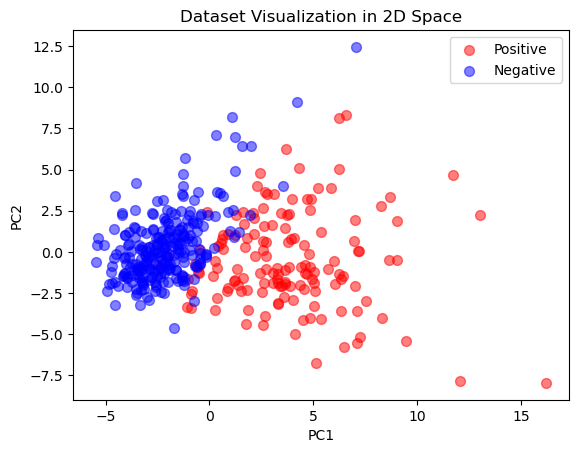

In [22]:
# Extract positive and negative data
positive_data = final_df[final_df['diagnosis'] == 1]
negative_data = final_df[final_df['diagnosis'] == 0]

# Create a figure and axis object
fig, ax = plt.subplots()

if not positive_data.empty:
    ax.scatter(positive_data['PC1'], positive_data['PC2'], color='red', label='Positive', alpha=0.5, s=50)

if not negative_data.empty:
    ax.scatter(negative_data['PC1'], negative_data['PC2'], color='blue', label='Negative', alpha=0.5, s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Dataset Visualization in 2D Space')
handles, labels = ax.get_legend_handles_labels() 
if handles: 
    ax.legend(handles, labels)

plt.show()

LOGISTIC REGRESSION WITH REGULARIZER

In [34]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

regularization_weights = [0.01, 0.1, 1, 10, 100]

def cross_validation_and_evaluation(X_train, y_train, regularization_weights):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = {}

    # Iterate over each regularization weight
    for weight in regularization_weights:
        scores = []

        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

            # Initialize and train the model with the current regularization weight
            model = LogisticRegression(C=weight)
            model.fit(X_train_fold, y_train_fold)

            # Make predictions on the validation set and compute accuracy
            y_pred = model.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)

            # Append accuracy to scores list
            scores.append(accuracy)

        # Calculate average accuracy across all folds
        avg_score = sum(scores) / len(scores)

        # Store average score for this weight in the dictionary
        cv_scores[weight] = avg_score

    # Find the regularization weight with the highest average score
    best_weight = max(cv_scores, key=cv_scores.get)
    best_score = cv_scores[best_weight]

    print(f"Best regularization weight: {best_weight}")
    print(f"Average cross-validation accuracy with best weight: {best_score}")

# Split data into features and target for train dataset
X_train = train_data.drop(columns=['diagnosis'])
y_train = train_data['diagnosis']

print("Results for the train dataset:")
cross_validation_and_evaluation(X_train, y_train, regularization_weights)

Results for the train dataset:
Best regularization weight: 0.01
Average cross-validation accuracy with best weight: 0.4429746835443038


In [24]:
X_train = train_data.drop(columns=['diagnosis'])
y_train = train_data['diagnosis']

X_test = test_data.drop(columns=['diagnosis'])
y_test = test_data['diagnosis']

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')  
recall = recall_score(y_test, y_pred, pos_label='M') 
f1 = f1_score(y_test, y_pred, pos_label='M') 

# Reporting the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.39520958083832336
Precision: 0.39520958083832336
Recall: 1.0
F1 Score: 0.5665236051502146


SVM

In [35]:
X_train = train_data.drop(columns=['diagnosis'])  
y_train = train_data['diagnosis']  
X_test = test_data.drop(columns=['diagnosis'])  
y_test = test_data['diagnosis']  

# Define the parameter grid for C values
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameter value
best_C = grid_search.best_params_['C']
print("Best value for C:", best_C)

Best value for C: 1000


In [33]:
best_svm = grid_search.best_estimator_


y_pred = best_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='M')

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='M')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label='M')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6047904191616766
Precision: 0.5
Recall: 0.06060606060606061
F1 Score: 0.10810810810810813


Neural Network

In [30]:
hidden_nodes_values = [10, 20, 30, 40, 50]

cv_scores = {}

# Iterate over each value of the number of hidden nodes
for hidden_nodes in hidden_nodes_values:
    # Initialize the Multi-layer Perceptron classifier
    mlp = MLPClassifier(hidden_layer_sizes=(hidden_nodes,), max_iter=1000)
    
    # Perform 5-fold cross-validation and compute the mean accuracy
    scores = cross_val_score(mlp, X_train, y_train, cv=5)
    avg_score = np.mean(scores)
    
    # Store average score for this number of hidden nodes in the dictionary
    cv_scores[hidden_nodes] = avg_score

# Find the number of hidden nodes with the highest average score
best_hidden_nodes = max(cv_scores, key=cv_scores.get)
best_score = cv_scores[best_hidden_nodes]

print("Best number of hidden nodes:", best_hidden_nodes)
print("Average cross-validation accuracy with best number of hidden nodes:", best_score)

Best number of hidden nodes: 20
Average cross-validation accuracy with best number of hidden nodes: 0.525


In [32]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')  # Assuming 'M' is the positive label
recall = recall_score(y_test, y_pred, pos_label='M')  # Assuming 'M' is the positive label
f1 = f1_score(y_test, y_pred, pos_label='M')  # Assuming 'M' is the positive label

# Reporting the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6047904191616766
Precision: 0.5
Recall: 0.06060606060606061
F1 Score: 0.10810810810810813


In [37]:
# Define the parameter grid for max_depth values
param_grid = {'max_depth': [3, 5, 7, 9, 11]} 
# Initialize the Decision Tree classifier
dtree = DecisionTreeClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameter value
best_max_depth = grid_search.best_params_['max_depth']
print("Best value for max_depth:", best_max_depth)

Best value for max_depth: 3


In [39]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')  
recall = recall_score(y_test, y_pred, pos_label='M') 
f1 = f1_score(y_test, y_pred, pos_label='M') 

# Reporting the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9580838323353293
Precision: 0.9538461538461539
Recall: 0.9393939393939394
F1 Score: 0.9465648854961831


In [69]:
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

X_train = training_data.drop(columns=['id', 'diagnosis'])
y_train = training_data['diagnosis']
X_test = testing_data.drop(columns=['id', 'diagnosis'])
y_test = testing_data['diagnosis']
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define range of neighbors
neighbors_range = range(1, 21)

# Perform 5-fold cross-validation to find the best number of neighbors
cv_scores = []
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores.append(scores.mean())

# Find the best value number of neighbors
best_neighbors = neighbors_range[cv_scores.index(max(cv_scores))]
print("best value for number  number of neighbors:", best_neighbors)



best value for number  number of neighbors: 3


In [70]:
y_pred = final_knn.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')  
recall = recall_score(y_test, y_pred, pos_label='M') 
f1 = f1_score(y_test, y_pred, pos_label='M') 

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9700598802395209
Precision: 0.9841269841269841
Recall: 0.9393939393939394
F1 Score: 0.9612403100775193


Advantages an Disadvantages 
1.Logistic regression
  Advantages: Easily interpretable and has low computational cost
  Disadvantages: logistic regression model is sensitive to outliers
 
2.Support Vector Machine
  Advantages: They are suitable for datasets with many features.
  Disadvantages: It requires careful selection of parameters and can                  be memory intensive with large datasets.
  
3.Neural Networks
  Advantages: It has ability to learn and adapt complex patterns
  Disadvantages: It results in high computational cost when used with                  large datasets.
  
4.Decision Tree
  Advantages: It is easy to interpret and visualize dtasets.
  Disadvantages: They are instable and prone to overfitting.
  
5.K-Nearest Neighbors
  Advantages: It is simple and easy to implement without requiring                 any training phase.
  Disadvantages: It is sensitive to irrelevant features.
  
  
Analysis:
KNN algorithm performs comparatively well on the given datasets as it as the higher accuracy, recall, precision and F1 values.
Accuracy: 0.9700598802395209
Precision: 0.9841269841269841
Recall: 0.9393939393939394
F1 Score: 0.9612403100775193